In [1]:
import pandas as pd

df_size = pd.read_csv(r"C:\Users\rcrds\Downloads\Size vs Salary.csv")
df_rating = pd.read_csv(r"C:\Users\rcrds\Downloads\Ratings vs Salary.csv")

In [10]:

order = [7,6,4,5,2,3,1]
df_size["Size Order"] = order
df_size = df_size.sort_values(by="Size Order", ascending = True)
df_size

,Company Size,Average Anual Salary,Size Order
6,1 to 50 employees,102.3,1
4,51 to 200 employees,112.7,2
5,201 to 500 employees,101.0,3
2,501 to 1000 employees,90.3,4
3,1001 to 5000 employees,92.9,5
1,5001 to 10000 employees,96.6,6
0,10000+ employees,112.7,7


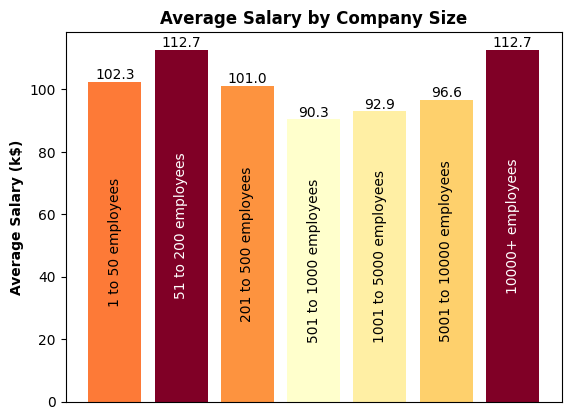

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

values = df_size["Average Anual Salary"]
categories = df_size["Company Size"]

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
colors = cm.YlOrRd(norm(values))

plt.figure()
bars = plt.bar(categories, values, color=colors)

for bar, value, label in zip(bars, values, categories):
    # Category name INSIDE the bar, rotated 90º
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 0.5,   # middle of bar
        label,
        ha='center',
        va='center',
        color='white' if norm(value) > 0.6 else 'black',
        rotation=90
    )

    # Value label ON TOP of bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{float(value):,}',
        ha='center',
        va='bottom',
        fontsize=10,
    )

plt.xticks([])  # hide x-axis labels since categories are inside bars
plt.ylabel('Average Salary (k$)', fontweight='bold')
plt.title('Average Salary by Company Size', fontweight='bold')

plt.show()

In [6]:
df_rating

,company_ISIN,Rating Compensation Benefits,Overall Rating,Average Salary
0,MX01WA000038,3.30,3.29,1390.00
1,JP3463000004,4.04,3.90,1322.86
2,CH0012005267,4.01,3.99,1140.71
3,US48203R1041,4.01,4.10,1315.00
4,FR0013154002,3.45,3.62,1080.00
5,US29476L1070,3.89,3.97,1300.00
6,US92826C8394,3.88,3.94,1528.33
7,CH0126881561,3.88,4.01,1230.00
8,US3848021040,3.94,4.00,1795.00
9,US09061G1013,4.09,3.78,1680.00
